# Projet ACP

## 1.Traitement des données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

Importation du fichier

In [25]:

output = '/content/Tweets.csv'


df = pd.read_csv(output, encoding='utf-8', sep=',')


In [26]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
df['sentiment'].unique()
df = df.loc[df['sentiment']!='neutral']
df = df[['text','sentiment']]

In [ ]:
df.head()

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
6,2am feedings for the baby are fun when he is a...,positive


In [ ]:
df = df.reset_index() # restore the indices of the dataframe so that it starts from 0 and skips nothing


In [ ]:
df.head()

,index,text,sentiment
0,1,Sooo SAD I will miss you here in San Diego!!!,negative
1,2,my boss is bullying me...,negative
2,3,what interview! leave me alone,negative
3,4,"Sons of ****, why couldn`t they put them on t...",negative
4,6,2am feedings for the baby are fun when he is a...,positive


In [ ]:
df['text'].count()

16363

In [ ]:
import spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

In [ ]:
len(stopwords)

326

In [ ]:
list(stopwords)[:10]

['being',
 'around',
 'mine',
 'herein',
 'last',
 'several',
 'wherein',
 'out',
 'whence',
 're']

Building a Preprocessing Pipeline


In [ ]:
import string

def preprocess(txt):
    tokens = txt.split()
    txt = ' '.join(tokens)

    # Remove punctuation
    txt = txt.translate(str.maketrans('', '', string.punctuation))

    # Tokenize again after removing punctuation
    tokens = txt.split()

    # Assuming 'stopwords' is a predefined list of stopwords
    tokens = [token for token in tokens if token not in stopwords]

    return ' '.join(tokens)

original_txt = df['text'][50]
processed_txt = preprocess(df['text'][50])
print(f'The original text was:\n{original_txt}\n------------\n The preprocessed text is: \n{processed_txt}')


The original text was:
 Well what im working on isn`t QUITE ready to post about publicly (still beta testing) but its a cool new script I coded
------------
 The preprocessed text is: 
Well im working isnt QUITE ready post publicly beta testing cool new script I coded


In [ ]:
df['Feed'] = df['text'].apply(lambda x: preprocess(str(x)))
df.head()


,index,text,sentiment,Feed
0,1,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I miss San Diego
1,2,my boss is bullying me...,negative,boss bullying
2,3,what interview! leave me alone,negative,interview leave
3,4,"Sons of ****, why couldn`t they put them on t...",negative,Sons couldnt releases bought
4,6,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos


In [ ]:
df_cleaned = df.dropna(subset=['Feed'])

df_cleaned = df_cleaned[df_cleaned['Feed'].astype(bool)]


In [ ]:
null_count = df['Feed'].isnull().sum()
print(f"La colonne 'Feed' contient {null_count} valeurs nulles.")

La colonne 'Feed' contient 0 valeurs nulles.


In [ ]:
null_count2 = df['sentiment'].isnull().sum()
print(f"La colonne 'Sentiment' contient {null_count2} valeurs nulles.")

La colonne 'Sentiment' contient 0 valeurs nulles.


In [ ]:
fichier_excel = 'TweetsFinal.xlsx'

df_cleaned.to_excel(fichier_excel, index=False)

In [ ]:
df_cleaned.head()

,index,text,Sentiment,Feed
0,1,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I miss San Diego
1,2,my boss is bullying me...,negative,boss bullying
2,3,what interview! leave me alone,negative,interview leave
3,4,"Sons of ****, why couldn`t they put them on t...",negative,Sons couldnt releases bought
4,6,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos


## 2. Application des modeles de prédiction

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_excel('TweetsFinal.xlsx')

In [ ]:
data.head()

,index,text,sentiment,Feed
0,1,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I miss San Diego
1,2,my boss is bullying me...,negative,boss bullying
2,3,what interview! leave me alone,negative,interview leave
3,4,"Sons of ****, why couldn`t they put them on t...",negative,Sons couldnt releases bought
4,6,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos


In [ ]:
data['Sentiment']=data['sentiment'].fillna('unknown')

In [ ]:
data['Label'] = data['Sentiment'].map({'positive': 0, 'negative': 1})
X = data['Feed']
y = data['Label']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data['Label'] = data['Sentiment'].map({'positive': 0, 'negative': 1})

X = data['Feed']
y = data['Label']

cv = CountVectorizer()
X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8366061504260838

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      2819
           1       0.85      0.80      0.82      2579

    accuracy                           0.84      5398
   macro avg       0.84      0.83      0.84      5398
weighted avg       0.84      0.84      0.84      5398



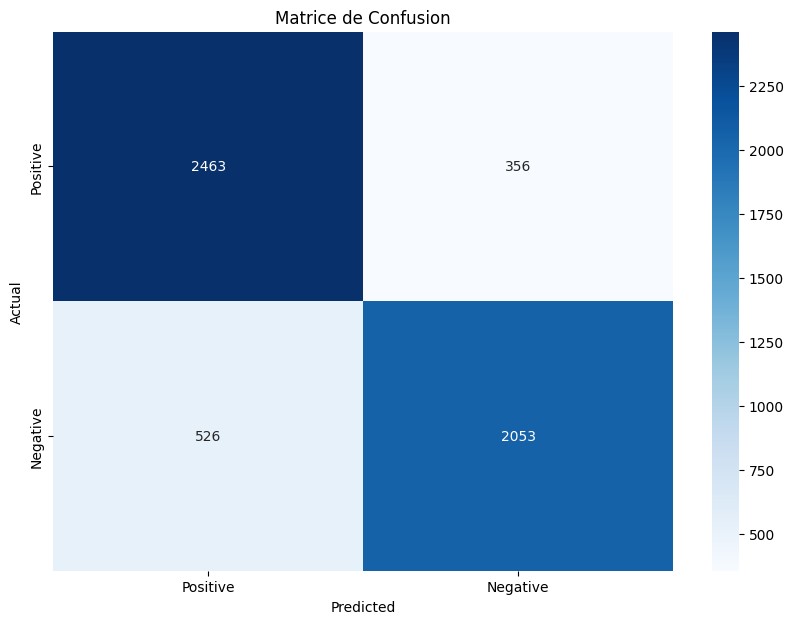

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Mapper les sentiments à des valeurs numériques
data['Label'] = data['Sentiment'].map({'positive': 0, 'negative': 1})

# Définir les variables explicatives et la variable cible
X = data['Feed']
y = data['Label']

# Convertir les textes en représentations numériques (Bag of Words)
cv = CountVectorizer()
X = cv.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialiser le classifieur Naïve Bayes
nb = MultinomialNB()

# Entraîner le modèle
nb.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = nb.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8569840681733976

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      2819
           1       0.85      0.85      0.85      2579

    accuracy                           0.86      5398
   macro avg       0.86      0.86      0.86      5398
weighted avg       0.86      0.86      0.86      5398



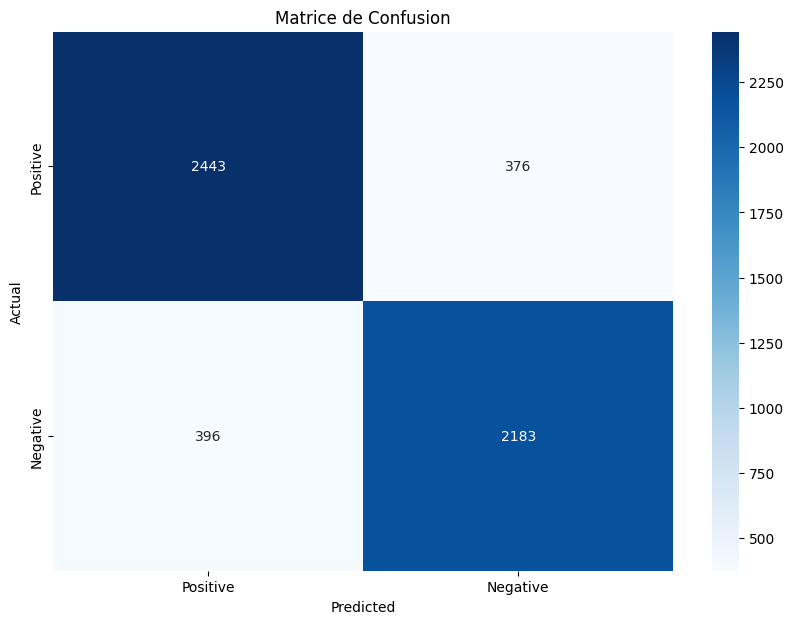

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Mapper les sentiments à des valeurs numériques
data['Label'] = data['Sentiment'].map({'positive': 0, 'negative': 1})

# Définir les variables explicatives et la variable cible
X = data['Feed']
y = data['Label']

# Convertir les textes en représentations numériques (Bag of Words)
cv = CountVectorizer()
X = cv.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialiser le modèle de régression logistique
lr = LogisticRegression(max_iter=1000, random_state=42)

# Entraîner le modèle
lr.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = lr.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8673582808447573

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2819
           1       0.85      0.87      0.86      2579

    accuracy                           0.87      5398
   macro avg       0.87      0.87      0.87      5398
weighted avg       0.87      0.87      0.87      5398



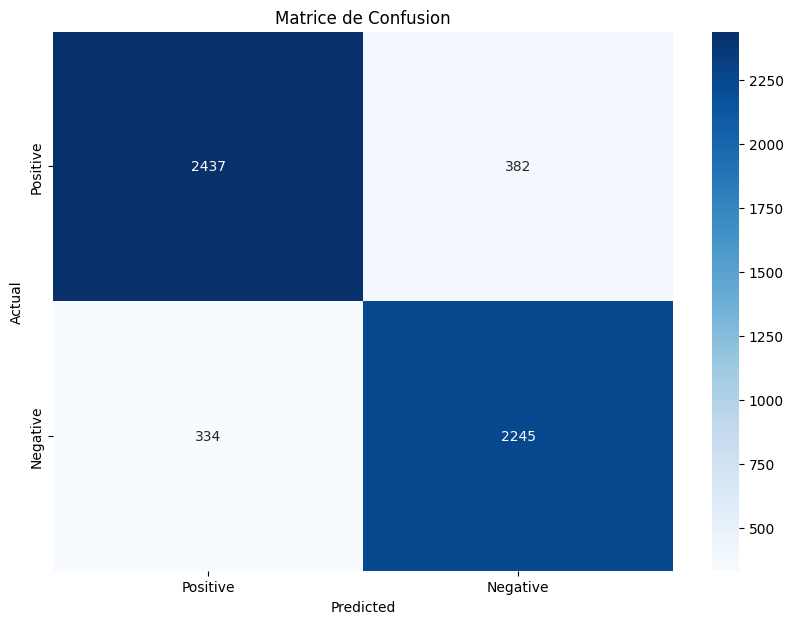

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
print(y.value_counts())

Label
0    8579
1    7776
Name: count, dtype: int64
